# Finding Indicators of Heavy Traffic on I-94

In [1]:
import pandas as pd

# Import out visualization library 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
traffic_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic_94

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [4]:
# Checking all of our data at-a-glance
traffic_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We have 9 columns and 48204 rows with no null entries

In [5]:
traffic_94[traffic_94['holiday'] == 'State Fair']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
8575,State Fair,297.42,0.0,0.0,12,Clouds,few clouds,2013-08-22 00:00:00,661
17750,State Fair,287.97,0.0,0.0,1,Clear,sky is clear,2015-08-27 00:00:00,605
26002,State Fair,290.82,0.0,0.0,1,Clear,sky is clear,2016-08-25 00:00:00,655
36551,State Fair,289.69,0.0,0.0,90,Rain,light rain,2017-08-24 00:00:00,657
46936,State Fair,289.02,0.0,0.0,1,Clear,sky is clear,2018-08-23 00:00:00,596


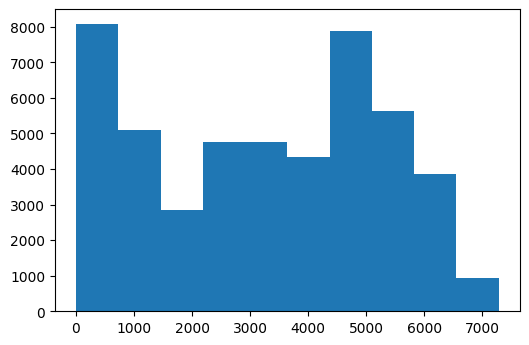

In [6]:
# Creating a visual frequency table known as a histogram
plt.hist(traffic_94['traffic_volume'])
plt.show()

In [7]:
# Check the statistics and distribution using describe()
traffic_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
# Generate a frequency table. It should
traffic_94['traffic_volume'].value_counts(bins=10).sort_index()

(-7.281000000000001, 728.0]    8095
(728.0, 1456.0]                5100
(1456.0, 2184.0]               2835
(2184.0, 2912.0]               4765
(2912.0, 3640.0]               4761
(3640.0, 4368.0]               4349
(4368.0, 5096.0]               7886
(5096.0, 5824.0]               5634
(5824.0, 6552.0]               3854
(6552.0, 7280.0]                925
Name: traffic_volume, dtype: int64

Now we're going to isolate the values based on the time of the day

In [9]:
# Changing date_time column into datetime dtype
traffic_94['date_time'] = pd.to_datetime(traffic_94['date_time'])

# Make a copy of our dataset
Day = traffic_94.copy()[(traffic_94['date_time'].dt.hour >= 7) & (traffic_94['date_time'].dt.hour < 19)]
Night = traffic_94.copy()[(traffic_94['date_time'].dt.hour < 7) | (traffic_94['date_time'].dt.hour >= 19)]

print(Day.shape)
print(Night.shape)

(23877, 9)
(24327, 9)


In the last cell, I did several tasks. First, I converted the `date_time` column into a `datetime` dtype, so we could make it easier to make `dt`-based transformations. Next, we made a copy of our `traffic_94` dataset created two boolean filtered dataframes that cover two distinct 12-hour periods:
 * 7 AM to 7 PM (Daytime)
 * 7 PM to 7 AM (Nightime)
 
According to our work, there are 24327 instances of `Night` and 23877 instances of `Day`

In [10]:


def day_or_night(time):
    # traffic_94['time_of_day'] = traffic_94['date_time'].dt.hour
    
    if time >= 7 and time < 19:
         return 'Day'
    else:
        return 'Night'

traffic_94['time_of_day'] = traffic_94['date_time'].dt.hour.apply(day_or_night)
 
traffic_94['time_of_day'].value_counts()

Night    24327
Day      23877
Name: time_of_day, dtype: int64

This is very similar to the filtered dataframe method. Only this time, I decided to make a function to transform our data element-wise using the apply() function. I created the day_or_night function to create a categorical column that designates a row as being Day or Night based on the value that it interacts with our date_time column after we convert into a 24 hour format using Series.dt.hour. These values will be placed in a new column called time_of_day.

After creating the new column, we then count how many instances of Night and Day are in time_of_day. I determined that there were 24327 instances of Night and 23877 instances of Day, just like in our other method.

Next, I want to find out why there is such a large discrepancy between the counts for Day vs. Night. Let's see an example of that that in the next cell.

In [11]:
traffic_94.iloc[205:207]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,time_of_day
205,None,275.34,0.0,0.0,1,Clear,sky is clear,2012-10-11 10:00:00,4638,Day
206,None,284.10,0.0,0.0,50,Clear,sky is clear,2012-10-11 14:00:00,5557,Day


I perused the dataset looking specifically at the `date_time` for irregularities and I found that although the traffic volume is supposed to be checked at 1 hour interval, many of those intervals were skipped and that's what resulted in the discrepancies between `Day` and `Night` 

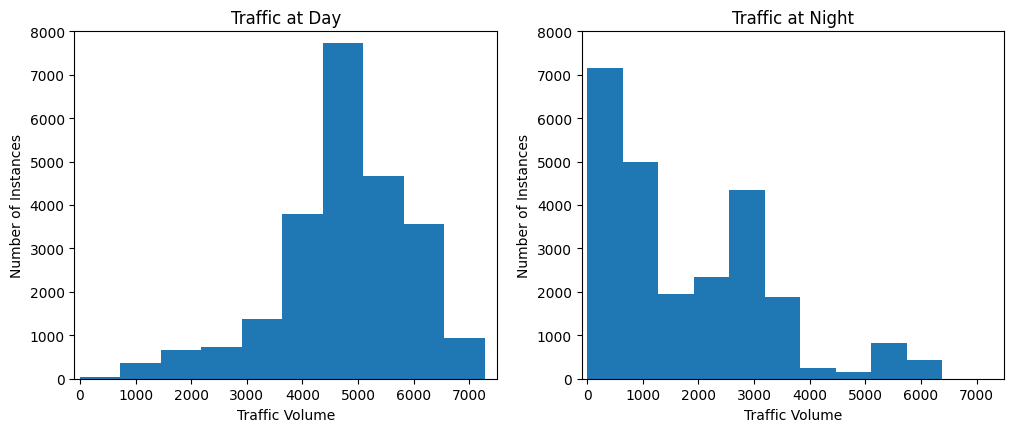

In [12]:
plt.figure(figsize=(12, 4.6))
plt.subplot(1, 2, 1)
plt.xlim(-100, 7500)
plt.ylabel('Number of Instances')
plt.xlabel('Traffic Volume')
plt.title('Traffic at Day')
plt.ylim(0, 8000)
plt.hist(traffic_94[traffic_94['time_of_day'] == 'Day']['traffic_volume'])

plt.subplot(1, 2, 2)
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.ylabel('Number of Instances')
plt.xlabel('Traffic Volume')
plt.title('Traffic at Night')
plt.hist(traffic_94[traffic_94['time_of_day'] == 'Night']['traffic_volume'])
plt.show()


# plt.show()

In [13]:
# Traffic at Day Statistics
traffic_94[traffic_94['time_of_day'] == 'Day']['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
# Traffic at Night Statistics
traffic_94[traffic_94['time_of_day'] == 'Night']['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Looking at the few cells above, it can be determined that the indicators of heavy traffic are overwhelmingly more prevalent at night than during the day. The `Day` graph has a left skew and the `Night` graph has a right skew. Because of I've determined that `Day` has a more substantial impact on traffic volume and the questions that we'd like to answer, I will focus solely on our daytime data. We will store the filtered dataframe we indexed for `Day` values earlier and store it in a separate dataframe: `day = traffic_94.copy()[traffic_94['time_of_day'] == 'Day']`

In [15]:
day = traffic_94.copy()[traffic_94['time_of_day'] == 'Day']

In [16]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

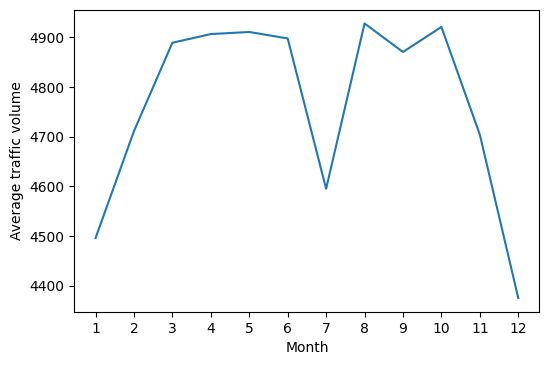

In [17]:
plt.plot(by_month['traffic_volume'])
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.xlabel('Month')
plt.ylabel('Average traffic volume')
plt.show()

Looking at our data here, I can see that there is an interesting dip in July for some reason. This goes against the expected trend that we would expect for the summer months.

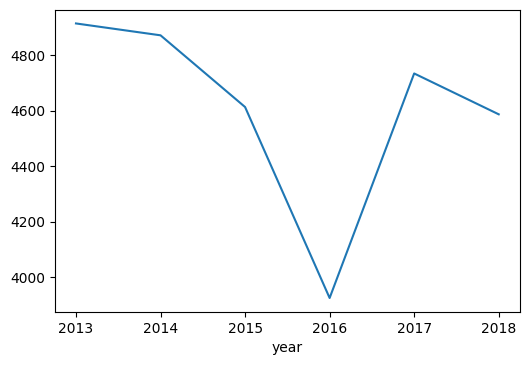

In [18]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

We investigate July further to see what was the cause in the dip in traffic volume by looking at `July` for other years. And we see that July 2016 accounted for the unusual dip when looking at out average volume per month graph a few cells above. And we can confidently say this because the other years mostly fell in line with the other summer months.

So I searched "july 2016 i94 minnesota" on Google and [this article](https://www.mprnews.org/story/2016/07/22/i94-stpaul-shutdown-twin-cities-weekend-road-woes) came up. The article indicated that I-94 was shutdown for at least a part of the month and this seems to explain why the traffic volume was so low for July 2016 in particular.

In [19]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

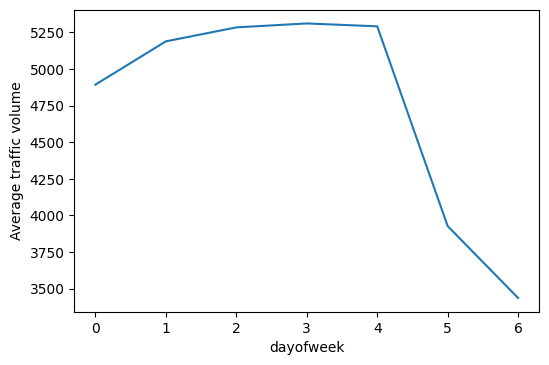

In [20]:
by_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Average traffic volume')
plt.show()

As we can see in our graph, there is a huge difference between the weekdays (values 0-4) and the weekends (values 5-6).

In [21]:
day['hour'] = day['date_time'].dt.hour
weekdays = day.copy()[day['dayofweek'] <= 4]
weekends = day.copy()[day['dayofweek'] > 4]
by_hour_weekdays = weekdays.groupby('hour').mean()
by_hour_weekends = weekends.groupby('hour').mean()

print(by_hour_weekdays['traffic_volume'])
print(by_hour_weekends['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


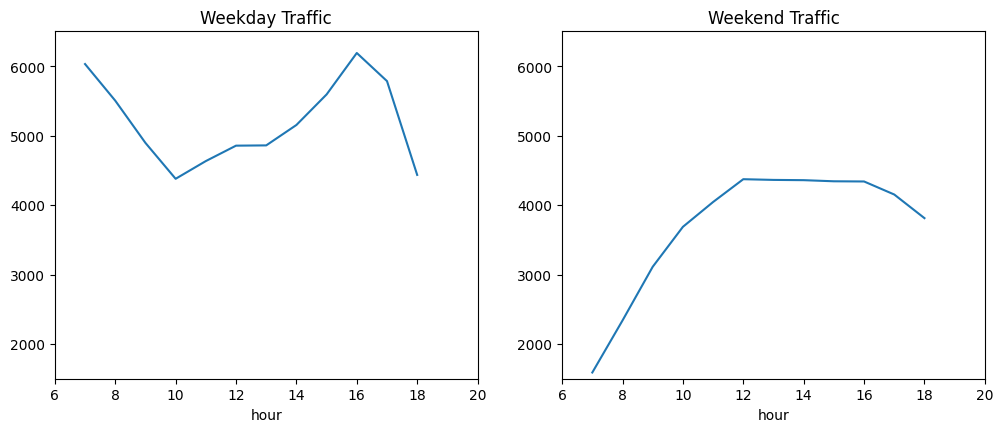

In [22]:
plt.figure(figsize=(12,4.6))
plt.subplot(1, 2, 1)
plt.ylim(1500 , 6500)
plt.xlim(6,20)
plt.title('Weekday Traffic')
by_hour_weekdays['traffic_volume'].plot.line()
plt.subplot(1, 2, 2)
plt.title('Weekend Traffic')
plt.ylim(1500, 6500)
plt.xlim(6,20)
by_hour_weekends['traffic_volume'].plot.line()
plt.show()

So for our `Weekday Traffic` graph, traffic volume is maxed out at 7 AM and around 4-5 PM. For `Weekend Traffic` the traffic volume peaks at 12 PM and stays relatively for flat the rest of the night.

In [23]:
weather_indicators = ['temp','rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

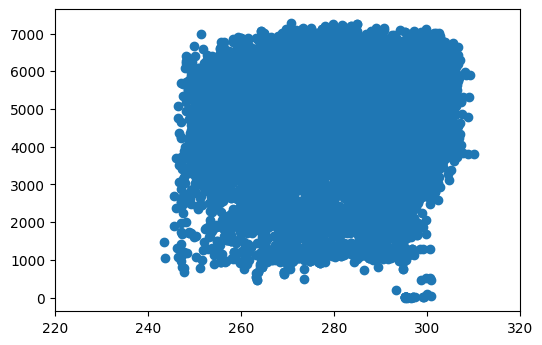

In [24]:
plt.scatter(day['temp'], day['traffic_volume'])
plt.xlim(220, 320)
plt.show()

Based on what I've seen here, this graph and none of the other columns seem to be reliable indicatiors of heavy traffic at all.

In [25]:
weather_main = day.groupby('weather_main').mean()
weather_description = day.groupby('weather_description').mean()

Above, we grouped the data by `weather_main` and `weather_description` and used `mean()` to aggregate the data.

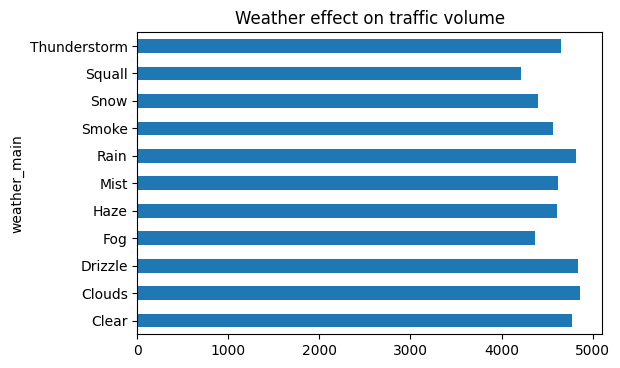

In [26]:
weather_main['traffic_volume'].plot.barh()
plt.title('Weather effect on traffic volume')
plt.show()

Looking at our graph, we can see that "Clouds" as the highest value, followed by "Drizzle", "Rain", and "Clear. But I don't think that this graph really tells us anything about how weather type influences heavy traffic.

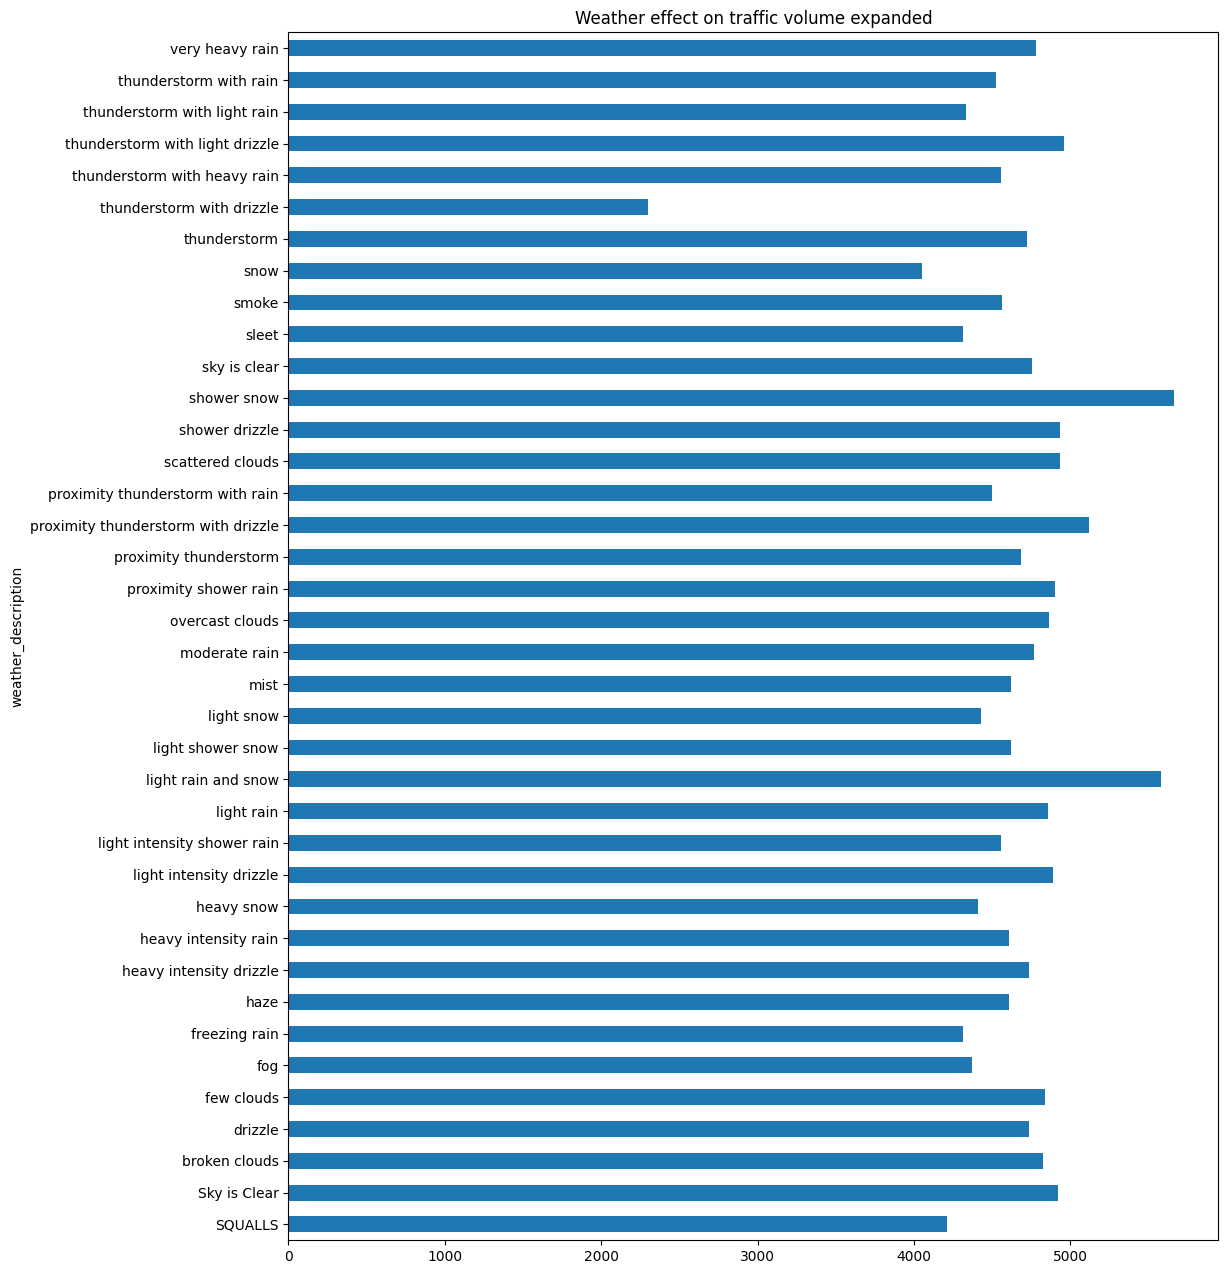

In [27]:
weather_description['traffic_volume'].plot.barh(figsize=(12, 16))
plt.title('Weather effect on traffic volume expanded')
plt.show()


For this graph there are 3 instances in where for average `weather_description` that exceed 5000 cars These are:
    * shower snow
    * light rain and snow
    * proximity thunderstorm with drizzle

Surprisingly, this is not what I personally expected because you'd expect most people to not want to take the road when this type of weather occurs. But in this case, the three types of weather above aren't truly inclement weather compared to other types. I think that these 3 particular types of weather might be the tipping point that jostles people who prefer to walk or ride a bicycle into taking a car instead.

In conclusion, I can determine that heavy traffic is influenced by the following:
   * Daytime (as opposed to night)
   * Weekdays (as opposed to weekends)
   * Rush hour times (7 AM and 4PM on weekdays)
   * Summer months (as opposed to winter months)
   * Three specific weather types:
        * shower snow
        * light rain and snow
        * proximity thunderstorm with drizzle
        
These factors, according to my insights are the most culpable for the heavier traffic volumes on I-94.
  